### Graham Kerr
#### graham.s.kerr@NASA.gov; kerrg@cua.edu

<H1 font size="+3" style="color:red">
OZ project Project<br>
-- Cross Sections Examples
</H1>

<b>This notebook will plot cross sections from various sources, comparing their relative strengths, and how closely fit results represent either the data or calculations.
 


---
### <b style="color:blue"> Some set up </b>

***Import Modules***

In [1]:
##
## Import some modules
##

import sys
sys.path.insert(0,'/Users/gskerr1/Documents/Research/Python_Programs/radynpy/')
sys.path.insert(0,'/Users/gskerr1/Documents/Research/OrrallZirkerEffect/')


import radynpy
import OrrallZirkerPy as OZpy
# from OrrallZirkerPy import CrossSections


import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import LogLocator
from matplotlib import ticker
import matplotlib.colorbar as cb
import pandas as pd

import cmocean
import colorcet as ccet
import palettable as pal 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [14]:
import importlib
importlib.reload(OZpy.CrossSections)


<module 'OrrallZirkerPy.CrossSections' from '/Users/gskerr1/Documents/Research/OrrallZirkerEffect/OrrallZirkerPy/CrossSections.py'>

***Set up plot properties***

In [15]:
##
## Plot properties (these are just personal preference)
##

#Avenir LT Std
font = {'family': 'Avenir LT Std',
        'color':  'black',
        'weight': 'medium',
        'size': 22,
        }
plot_params = {'ytick.direction': 'in', 
               'xtick.direction': 'in', 
               'xtick.minor.visible': True,
               'ytick.minor.visible': True,
               'xtick.major.size': 10, 'xtick.minor.size': 5,
               'ytick.major.size': 10, 'ytick.minor.size': 5,
               'ytick.right': False,
               'xtick.top': False,
               'ytick.major.width': 1.5,
               'xtick.major.width': 1.5,
               'ytick.minor.width': 1.5,
               'xtick.minor.width': 1.5,
               'axes.linewidth': 1.5,
               'axes.spines.top': False,
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': False,
               'axes.titlepad' : 18 }

plot_lg_params = {'legend.frameon': False}
#plt.rcParams.update({'font.size': font['size'], 'font.family':font['family'], 'font.weight':font['weight'], 'font.color':font['color']})

plt.rcParams.update({'font.size':font['size'], 'font.family':font['family'], 'font.weight':font['weight']})
plt.rcParams.update({'ytick.direction': plot_params['ytick.direction'],
                     'xtick.direction': plot_params['xtick.direction'],
                     'xtick.minor.visible': plot_params['xtick.minor.visible'],
                     'ytick.minor.visible': plot_params['ytick.minor.visible'],
                     'ytick.major.size':  plot_params['ytick.major.size'], 
                     'ytick.minor.size':  plot_params['ytick.minor.size'],
                     'xtick.major.size':  plot_params['xtick.major.size'],                                
                     'xtick.minor.size':  plot_params['xtick.minor.size'],
                     'ytick.right': plot_params['ytick.right'],
                     'xtick.top': plot_params['xtick.top'],
                     'ytick.major.width': plot_params['ytick.major.width'],
                     'xtick.major.width': plot_params['xtick.major.width'],
                     'ytick.minor.width': plot_params['ytick.minor.width'],
                     'xtick.minor.width': plot_params['xtick.minor.width'],                    
                     'axes.linewidth': plot_params['axes.linewidth'],
                     'axes.spines.top' : plot_params['axes.spines.top'],
                     'axes.spines.bottom' : plot_params['axes.spines.bottom'],
                     'axes.spines.left' : plot_params['axes.spines.left'],
                     'axes.spines.right' : plot_params['axes.spines.right'],
                     'axes.titlepad' : plot_params['axes.titlepad'],
                    })

plt.rcParams.update({'legend.frameon': plot_lg_params['legend.frameon']})

mpl.mathtext.SHRINK_FACTOR = 0.6
mpl.mathtext.GROW_FACTOR = 1 / 0.6





template = dict(
        layout = go.Layout(font = dict(family = "Rockwell", size = 18),
                           title_font = dict(family = "Rockwell", size = 22), 
                           plot_bgcolor = 'white',
                           paper_bgcolor = 'white',
                           xaxis = dict(
                                showexponent = 'all',
                                exponentformat = 'e',
                                tickangle = 0,
                                linewidth = 4,
                                showgrid = True,
                            ),
                            yaxis = dict(
                          showexponent = 'all',
                          exponentformat = 'e',
                                linewidth = 4,
                                showgrid = True,
                                anchor = 'free',
                                position = 0,
                                domain = [0.0,1]
                            ),
                            coloraxis_colorbar = dict(
                                thickness = 15,
                                tickformat = '0.2f',
                                ticks = 'outside',
                                titleside = 'right'
                            )
                            ))

---
### <b style="color:blue"> Calculate or extract the cross sections </b>

***Set up the CrossSec object with requested energy values***

In [16]:
energy = np.arange(1, 5001, 1)
cs = OZpy.CrossSections.CrossSec(energy)

***Run the various functions***

In [17]:
f95 = cs.cs_fang95()
bw99 = cs.cs_bw99()
kerr = cs.cs_kerr_fit1()
cheshire70 = OZpy.CrossSections.cs_cheshire70()
ludde82 = OZpy.CrossSections.cs_ludde82()
shakeshaft78 = OZpy.CrossSections.cs_shakeshaft78()
bates53 = OZpy.CrossSections.cs_bates53()
winter09 = OZpy.CrossSections.cs_winter09()
belkic92 = OZpy.CrossSections.cs_belkic92()
tselia12 = OZpy.CrossSections.cs_tselia12()

---
### <b style="color:blue"> Compare the various sources of data </b>
> - Overlays the original sources of data (some, e.g. Winter supercedes Shakeshaft)



In [ ]:
savepng = True
fname_out = 'Q_p1_DataComps_intE'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(1s) + H$^{+}$'
xrange = [10, 200]
yrange = [1e-2, 500]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Bates 1953', 'Cheshire 1970', 'Shakeshaft 1978',
          'Ludde et al 1982', 'Winter 2009', 'Belkic et al 1992', 'Tseliakhovich et al 2012']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(bates53.energy, bates53.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[0]
                 )
line2, = ax1.plot(cheshire70.energy, cheshire70.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
#                   zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[1]
                 )
line3, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[2]
                 )
line4, = ax1.plot(ludde82.energy, ludde82.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'D', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[3]
                 )
line5, = ax1.plot(winter09.energy, winter09.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'black',
#                   zorder = 0, alpha = 0.35,
                   marker = 'o', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[4]
                 )
line6, = ax1.plot(belkic92.energy, belkic92.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'violet',
#                   zorder = 0, alpha = 0.35,
                   marker = 's', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[5]
                 )
line7, = ax1.plot(tselia12.energy, tselia12.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'goldenrod',
#                   zorder = 0, alpha = 0.35,
                   marker = '*', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[6]
                 )
# line1, = ax1.plot(bates53.energy, bates53.Q_p3,
#                    linewidth = 2, linestyle = '-', color = 'dimgrey',
# #                   zorder = 0, alpha = 0.35,
# #                    marker = 'P', markeredgewidth = 1, 
# #                    markersize = 8,
#                    label = labels[0])
# line1, = ax1.plot(bates53.energy, bates53.Q_p2,
#                    linewidth = 2, linestyle = '-', color = 'black',
# #                   zorder = 0, alpha = 0.35,
# #                    marker = 'P', markeredgewidth = 1, 
# #                    markersize = 8,
#                    label = labels[0]
#                  )                

leg1 = ax1.legend(handles=[line1,line2,line3,line4,line5,line6,line7],loc=(1.025,0.15), fontsize = 15)

ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

In [ ]:
savepng = True
fname_out = 'Q_p2_DataComps_intE'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(n=2) + H$^{+}$'
xrange = [10, 200]
yrange = [1e-2, 50]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Bates 1953', 'Cheshire 1970', 'Shakeshaft 1978',
          'Ludde et al 1982', 'Winter 2009', 'Belkic et al 1992', 'Tseliakhovich et al 2012']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(bates53.energy, bates53.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[0]
                 )
line2, = ax1.plot(cheshire70.energy, cheshire70.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
#                   zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[1]
                 )
line3, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[2]
                 )
line4, = ax1.plot(ludde82.energy, ludde82.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'D', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[3]
                 )
line5, = ax1.plot(winter09.energy, winter09.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'black',
#                   zorder = 0, alpha = 0.35,
                   marker = 'o', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[4]
                 )
line6, = ax1.plot(belkic92.energy, belkic92.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'violet',
#                   zorder = 0, alpha = 0.35,
                   marker = 's', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[5]
                 )
line7, = ax1.plot(tselia12.energy, tselia12.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'goldenrod',
#                   zorder = 0, alpha = 0.35,
                   marker = '*', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[6]
                 )



leg1 = ax1.legend(handles=[line1,line2,line3,line4,line5,line6,line7],loc=(1.025,0.15), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

In [ ]:
savepng = True
fname_out = 'Q_p3_DataComps_intE'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(n=3) + H$^{+}$'
xrange = [10, 200]
yrange = [1e-3, 5]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Bates 1953', 'Cheshire 1970', 'Shakeshaft 1978',
          'Ludde et al 1982', 'Winter 2009', 'Belkic et al 1992','Tseliakhovich et al 2012']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(bates53.energy, bates53.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[0]
                 )

line3, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[2]
                 )
line4, = ax1.plot(ludde82.energy, ludde82.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'D', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[3]
                 )
line5, = ax1.plot(winter09.energy, winter09.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'black',
#                   zorder = 0, alpha = 0.35,
                   marker = 'o', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[4]
                 )
line6, = ax1.plot(belkic92.energy, belkic92.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'violet',
#                   zorder = 0, alpha = 0.35,
                   marker = 's', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[5]
                 )
line7, = ax1.plot(tselia12.energy, tselia12.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'goldenrod',
#                   zorder = 0, alpha = 0.35,
                   marker = '*', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[6]
                 )





leg1 = ax1.legend(handles=[line1,line3,line4,line5,line6,line7],loc=(1.025,0.15), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

---
### <b style="color:blue"> Compare the fits to rates to the data </b>
> - Overlays the original sources of data with the fits that employed that data (BW99 & Fang95)

***Fang95 vs the underlying data***

In [ ]:
savepng = True
fname_out = 'Fang95_Q_p1_vs_data_comp'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(1s) + H$^{+}$'
xrange = [1, 1000]
yrange = [5e-3, 300]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Fang et al 1995', 'Cheshire 1970', 'Ludde et al 1982','Shakeshaft 1978','Bates 1953']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(f95.energy, f95.Q_p1,
                   linewidth = 4, linestyle = '-', color = 'black',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[0]
                 )
line2, = ax1.plot(cheshire70.energy, cheshire70.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
                  zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[1]
                 )
line3, = ax1.plot(ludde82.energy, ludde82.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'D', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[2]
                 )
line4, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[3]
                 )
line5, = ax1.plot(bates53.energy, bates53.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[4]
                 )
leg1 = ax1.legend(handles=[line1,line2,line3,line4,line5],loc=(1.025,0.65), fontsize = 15)

ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

In [ ]:
savepng = True
fname_out = 'Fang95_Q_p2_vs_data_comp'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(n=2) + H$^{+}$'
xrange = [1, 1000]
yrange = [5e-3, 15]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Fang et al 1995', 'Cheshire 1970', 'Ludde et al 1982','Shakeshaft 1978','Bates 1953']
labelssub = ['Shakeshaft 1978 H(2s)','Shakeshaft 1978 H(2p0)','Shakeshaft 1978 H(2p1)', 
             'Ludde et al 1982 H(2s)', 'Ludde et al 1982 H(2p)']

if logx == True:
    xtitle = ' E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(f95.energy, f95.Q_p2,
                   linewidth = 4, linestyle = '-', color = 'black',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[0]
                 )
line2, = ax1.plot(cheshire70.energy, cheshire70.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
                  zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 7,
                   label = labels[1]
                 )
line3, = ax1.plot(ludde82.energy, ludde82.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'D', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[2]
                 )
line3a, = ax1.plot(ludde82.energy, ludde82.Q_p_2s,
                   linewidth = 2, linestyle = '-', color = 'dodgerblue',
                  zorder = 0, alpha = 0.55,
#                    marker = 'D', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labelssub[3]
                 )
line3b, = ax1.plot(ludde82.energy, ludde82.Q_p_2p,
                   linewidth = 2, linestyle = '--', color = 'dodgerblue',
                  zorder = 0, alpha = 0.55,
#                    marker = 'D', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labelssub[4]
                 )
line4, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[3]
                 )
line4a, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p_2s,
                   linewidth = 2, linestyle = '-', color = 'forestgreen',
                  zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
                   markersize = 10,
                   label = labelssub[0]
                 )
line4b, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p_2p0,
                   linewidth = 2, linestyle = '--', color = 'forestgreen',
                  zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
                   markersize = 10,
                   label = labelssub[1]
                 )
line4c, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p_2p1,
                   linewidth = 2, linestyle = '-.', color = 'forestgreen',
                  zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
                   markersize = 10,
                   label = labelssub[2]
                 )
line5, = ax1.plot(bates53.energy, bates53.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[4]
                 )
leg1 = ax1.legend(handles=[line1,line2,line3,line3a,line3b,
                           line4,line4a,line4b,line4c,line5],loc=(1.025,0.), fontsize = 15)

ax1.axvline(x=18, color = 'dodgerblue', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

In [ ]:
savepng = True
fname_out = 'Fang95_Q_p3_vs_data_comp'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(n=3) + H$^{+}$'
xrange = [1, 1000]
yrange = [5e-3, 15]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Fang et al 1995', 'Cheshire 1970', 'Ludde et al 1982','Shakeshaft 1978','Bates 1953']
labelssub = ['Shakeshaft 1978 H(3s)','Shakeshaft 1978 H(3p)','Shakeshaft 1978 H(3d)' 
            ]

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(f95.energy, f95.Q_p3,
                   linewidth = 4, linestyle = '-', color = 'black',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[0]
                 )

line3, = ax1.plot(ludde82.energy, ludde82.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'D', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[2]
                 )
line4, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[3]
                 )
line4a, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p_3s,
                   linewidth = 2, linestyle = '-', color = 'forestgreen',
                  zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
                   markersize = 10,
                   label = labelssub[0]
                 )
line4b, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p_3p0+shakeshaft78.Q_p_3p1,
                   linewidth = 2, linestyle = '--', color = 'forestgreen',
                  zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
                   markersize = 10,
                   label = labelssub[1]
                 )
line4c, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p_3d0+shakeshaft78.Q_p_3d1+shakeshaft78.Q_p_3d2,
                   linewidth = 2, linestyle = '-.', color = 'forestgreen',
                  zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
                   markersize = 10,
                   label = labelssub[2]
                 )
line5, = ax1.plot(bates53.energy, bates53.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[4]
                 )
leg1 = ax1.legend(handles=[line1,line3,
                           line4,line4a,line4b,line4c,line5],loc=(1.025,0.), fontsize = 15)

ax1.axvline(x=16, color = 'dodgerblue', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

***BW99 vs underlying data***
> - 1s (n=1)

In [ ]:
savepng = True
fname_out = 'BW99_Q_p1_vs_data_comp'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(1s) + H$^{+}$'
xrange = [1, 1000]
yrange = [5e-4, 1000]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Brosius & Woodgate 1999','Bates 1953']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        

line1, = ax1.plot(bw99.energy, bw99.Q_p1,
                   linewidth = 4, linestyle = '-', color = 'black',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[0]
                 )
line2, = ax1.plot(bates53.energy, bates53.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[1]
                 )

leg1 = ax1.legend(handles=[line1,line2],loc=(1.025,0.65), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

In [ ]:
savepng = True
fname_out = 'BW99_Q_p2_vs_data_comp'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(n=2) + H$^{+}$'
xrange = [1, 1000]
yrange = [5e-4, 100]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Brosius & Woodgate 1999','Bates 1953 H(n=2)', 'Bates 1953 H(2s)', 'Bates 1953 H(2p)']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        

line1, = ax1.plot(bw99.energy, bw99.Q_p2,
                   linewidth = 3, linestyle = '-', color = 'black',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[0]
                 )
line2, = ax1.plot(bates53.energy, bates53.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
#                   zorder = 0, alpha = 0.55,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[1]
                 )
line3, = ax1.plot(bates53.energy, bates53.Q_p_2s,
                   linewidth = 3, linestyle = '-', color = 'tomato',
                  zorder = 50, alpha = 1.0,
#                    marker = 'd', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[2]
                 )

line4, = ax1.plot(bates53.energy, bates53.Q_p_2p,
                   linewidth = 3, linestyle = '--', color = 'tomato',
                  zorder = 50, alpha = 1,
#                    marker = 'D', markeredgewidth = 1, 
#                    markersize = 5,
                   label = labels[3]
                 )
leg1 = ax1.legend(handles=[line1,line2,line3,line4],loc=(1.025,0.65), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

***Fang95 vs the BW99***
> - 1s (n=1)

In [ ]:
savepng = True
fname_out = 'Fang95_BW99_Q_p1_vs_data_comp'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(1s) + H$^{+}$'
xrange = [1, 1000]
yrange = [5e-4, 300]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Fang et al 1995', 'Brosius & Woodgate 1999', 'Cheshire 1970','Bates 1953']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(f95.energy, f95.Q_p1,
                   linewidth = 4, linestyle = '-', color = 'black',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[0]
                 )
line2, = ax1.plot(bw99.energy, bw99.Q_p1,
                   linewidth = 4, linestyle = '-.', color = 'dimgrey',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[1]
                 )
line3, = ax1.plot(cheshire70.energy, cheshire70.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
                  zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[2]
                 )
line4, = ax1.plot(bates53.energy, bates53.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[3]
                 )

leg1 = ax1.legend(handles=[line1,line2,line3,line4],loc=(1.025,0.65), fontsize = 15)

ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

In [ ]:
savepng = True
fname_out = 'Fang95_BW99_Q_p2_vs_data_comp'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(n=2) + H$^{+}$'
xrange = [1, 1000]
yrange = [5e-4, 300]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Fang et al 1995', 'Brosius & Woodgate 1999', 'Ludde et al 1989', 'Shakeshaft et al 1978','Bates 1953']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(f95.energy, f95.Q_p2,
                   linewidth = 4, linestyle = '-', color = 'black',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[0]
                 )
line2, = ax1.plot(bw99.energy, bw99.Q_p2,
                   linewidth = 4, linestyle = '-.', color = 'dimgrey',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[1]
                 )
line3, = ax1.plot(ludde82.energy, ludde82.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
                  zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[2]
                 )
line4, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
                  zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[3]
                 )
line5, = ax1.plot(bates53.energy, bates53.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[4]
                 )

leg1 = ax1.legend(handles=[line1,line2,line3,line4,line5],loc=(1.025,0.65), fontsize = 15)

ax1.axvline(x=18, color = 'dodgerblue', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

---
### <b style="color:blue"> Perform fits to data </b>
> - Performs n-th polynomial fits to the data
> - We are stiching together Winter 2009 (low-E range), and Belkic et al 1992 (high-energy range)
> - From 1-100 keV (winter) and 100-8000 keV (Belkic)




***Combine the data***

In [6]:
e1 = 1.00
e2 = 100.00
e3 = 125.00
e4 = 8000.00
eind1 = np.abs(winter09.energy - e1).argmin()
eind2 = np.abs(winter09.energy - e2).argmin()
eind3 = np.abs(belkic92.energy - e3).argmin()
eind4 = np.abs(belkic92.energy - e4).argmin()
energy_tot = np.concatenate((winter09.energy[eind1:eind2+1], belkic92.energy[eind3:eind4+1]))

csec_tot_1= np.concatenate((winter09.Q_p1[eind1:eind2+1],belkic92.Q_p1[eind3:eind4+1]))
csec_tot_2 = np.concatenate((winter09.Q_p2[eind1:eind2+1],belkic92.Q_p2[eind3:eind4+1]))
csec_tot_2s = np.concatenate((winter09.Q_p_2s[eind1:eind2+1],belkic92.Q_p_2s[eind3:eind4+1]))
csec_tot_2p = np.concatenate((winter09.Q_p_2p[eind1:eind2+1],belkic92.Q_p_2p[eind3:eind4+1]))
csec_tot_3 = np.concatenate((winter09.Q_p3[eind1:eind2+1],belkic92.Q_p3[eind3:eind4+1]))
csec_tot_3s = np.concatenate((winter09.Q_p_3s[eind1:eind2+1],belkic92.Q_p_3s[eind3:eind4+1]))
csec_tot_3p = np.concatenate((winter09.Q_p_3p[eind1:eind2+1],belkic92.Q_p_3p[eind3:eind4+1]))
csec_tot_3d = np.concatenate((winter09.Q_p_3d[eind1:eind2+1],belkic92.Q_p_3d[eind3:eind4+1]))

energy2plot = np.arange(1,8001,1)

In [7]:
energy_tot

array([1.000e+00, 1.563e+00, 3.000e+00, 4.000e+00, 5.160e+00, 8.000e+00,
       1.500e+01, 2.500e+01, 5.000e+01, 7.500e+01, 1.000e+02, 1.250e+02,
       1.500e+02, 2.000e+02, 3.000e+02, 4.000e+02, 5.000e+02, 6.000e+02,
       7.000e+02, 8.000e+02, 9.000e+02, 1.000e+03, 2.000e+03, 3.000e+03,
       4.000e+03, 5.000e+03, 6.000e+03, 7.000e+03, 8.000e+03])

***Fit the data***
> - n=1

In [8]:
pfit_n1_4deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_1,  
                                                       order = 4, log10E = True, log10Q = True)
pfit_n1_5deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_1,  
                                                       order = 5, log10E = True, log10Q = True)
pfit_n1_6deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_1,  
                                                       order = 6, log10E = True, log10Q = True)
pfit_n1_7deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_1,  
                                                       order = 7, log10E = True, log10Q = True)
pfit_n1_8deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_1,  
                                                       order = 8, log10E = True, log10Q = True)
cfit_n1_4deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_1,  
                                                       order = 4, log10E = True, log10Q = True)
cfit_n1_5deg = OZpy.CrossSections.cs_chebfit(energy_tot, csec_tot_1,  
                                                       order = 5, log10E = True, log10Q = True)
cfit_n1_6deg = OZpy.CrossSections.cs_chebfit(energy_tot, csec_tot_1,  
                                                       order = 6, log10E = True, log10Q = True)
cfit_n1_7deg = OZpy.CrossSections.cs_chebfit(energy_tot, csec_tot_1,  
                                                       order = 7, log10E = True, log10Q = True)
cfit_n1_8deg = OZpy.CrossSections.cs_chebfit(energy_tot, csec_tot_1,  
                                                       order = 8, log10E = True, log10Q = True)





> - n = 2

In [9]:
pfit_n2_4deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_2,  
                                                       order = 4, log10E = True, log10Q = True)
pfit_n2_5deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_2,  
                                                       order = 5, log10E = True, log10Q = True)
pfit_n2_6deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_2,  
                                                       order = 6, log10E = True, log10Q = True)
pfit_n2_7deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_2,  
                                                       order = 7, log10E = True, log10Q = True)
pfit_n2_8deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_2,  
                                                       order = 8, log10E = True, log10Q = True)





> - n = 2 (comps)

In [10]:
pfit_n2s_4deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_2s,  
                                                       order = 4, log10E = True, log10Q = True)
pfit_n2s_5deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_2s,  
                                                       order = 5, log10E = True, log10Q = True)
pfit_n2s_6deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_2s,  
                                                       order = 6, log10E = True, log10Q = True)
pfit_n2s_7deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_2s,  
                                                       order = 7, log10E = True, log10Q = True)
pfit_n2s_8deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_2s,  
                                                       order = 8, log10E = True, log10Q = True)



pfit_n2p_4deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_2p,  
                                                       order = 4, log10E = True, log10Q = True)
pfit_n2p_5deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_2p,  
                                                       order = 5, log10E = True, log10Q = True)
pfit_n2p_6deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_2p,  
                                                       order = 6, log10E = True, log10Q = True)
pfit_n2p_7deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_2p,  
                                                       order = 7, log10E = True, log10Q = True)
pfit_n2p_8deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_2p,  
                                                       order = 8, log10E = True, log10Q = True)




> - n = 3

In [11]:
pfit_n3_4deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3,  
                                                       order = 4, log10E = True, log10Q = True)
pfit_n3_5deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3,  
                                                       order = 5, log10E = True, log10Q = True)
pfit_n3_6deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3,  
                                                       order = 6, log10E = True, log10Q = True)
pfit_n3_7deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3,  
                                                       order = 7, log10E = True, log10Q = True)
pfit_n3_8deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3,  
                                                       order = 8, log10E = True, log10Q = True)





> - n = 3 (comps)

In [12]:
pfit_n3s_4deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3s,  
                                                       order = 4, log10E = True, log10Q = True)
pfit_n3s_5deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3s,  
                                                       order = 5, log10E = True, log10Q = True)
pfit_n3s_6deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3s,  
                                                       order = 6, log10E = True, log10Q = True)
pfit_n3s_7deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3s,  
                                                       order = 7, log10E = True, log10Q = True)
pfit_n3s_8deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3s,  
                                                       order = 8, log10E = True, log10Q = True)



pfit_n3p_4deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3p,  
                                                       order = 4, log10E = True, log10Q = True)
pfit_n3p_5deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3p,  
                                                       order = 5, log10E = True, log10Q = True)
pfit_n3p_6deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3p,  
                                                       order = 6, log10E = True, log10Q = True)
pfit_n3p_7deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3p,  
                                                       order = 7, log10E = True, log10Q = True)
pfit_n3p_8deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3p,  
                                                       order = 8, log10E = True, log10Q = True)


pfit_n3d_4deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3d,  
                                                       order = 4, log10E = True, log10Q = True)
pfit_n3d_5deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3d,  
                                                       order = 5, log10E = True, log10Q = True)
pfit_n3d_6deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3d,  
                                                       order = 6, log10E = True, log10Q = True)
pfit_n3d_7deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3d,  
                                                       order = 7, log10E = True, log10Q = True)
pfit_n3d_8deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_3d,  
                                                       order = 8, log10E = True, log10Q = True)





***Overplot the fits to data***

> - n = 1

In [ ]:
savepng = True
fname_out = 'MyFits_Q_p1_DataComps_lowE'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(1s) + H$^{+}$'
xrange = [1, 20]
yrange = [1e1, 500]
cmaptemp = pal.cartocolors.sequential.Sunset_5.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.1,1.0,5))


labels = ['Bates 1953', 'Cheshire 1970', 'Shakeshaft 1978',
          'Ludde et al 1982', 'Winter 2009', 'Belkic et al 1992', 'Tseliakhovich et al 2012',
          '4-deg poly', '5-deg poly', '6-deg poly', '7-deg poly', '8-deg poly']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(bates53.energy, bates53.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[0]
                 )
line2, = ax1.plot(cheshire70.energy, cheshire70.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
#                   zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[1]
                 )
line3, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[2]
                 )
line4, = ax1.plot(ludde82.energy, ludde82.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'D', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[3]
                 )
line5, = ax1.plot(winter09.energy, winter09.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'black',
#                   zorder = 0, alpha = 0.35,
                   marker = 'o', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[4]
                 )
line6, = ax1.plot(belkic92.energy, belkic92.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'violet',
#                   zorder = 0, alpha = 0.35,
                   marker = 's', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[5]
                 )
line7, = ax1.plot(tselia12.energy, tselia12.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'goldenrod',
#                   zorder = 0, alpha = 0.35,
                   marker = '*', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[6]
                 )

line1a, = ax1.plot(energy2plot, 10**(pfit_n1_4deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = colors[0],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[7]
                 )

line1b, = ax1.plot(energy2plot, 10**(pfit_n1_5deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = '--', color = colors[1],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[8]
                 )
line1c, = ax1.plot(energy2plot, 10**(pfit_n1_6deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = ':', color = colors[2],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[9]
                 )
line1d, = ax1.plot(energy2plot, 10**(pfit_n1_7deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = '-.', color = colors[3],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[10]
                 )
line1e, = ax1.plot(energy2plot, 10**(pfit_n1_8deg(np.log10(energy2plot))),
                   linewidth = 2, linestyle = '-', color = colors[4],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[11]
                 )









leg1 = ax1.legend(handles=[line1,line2,line3,line4,line5,line6,line7,
                           line1a, line1b, line1c, line1d, line1e],loc=(1.025,-0.10), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

> - n=2 (total)

In [ ]:
savepng = True
fname_out = 'MyFits_Q_p2_DataComps_lowE'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(n=2) + H$^{+}$'
xrange = [1, 20]
yrange = [1e0, 50]
cmaptemp = pal.cartocolors.sequential.Sunset_5.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.1,1.0,5))


labels = ['Bates 1953', 'Cheshire 1970', 'Shakeshaft 1978',
          'Ludde et al 1982', 'Winter 2009', 'Belkic et al 1992', 'Tseliakhovich et al 2012',
          '4-deg poly', '5-deg poly', '6-deg poly', '7-deg poly', '8-deg poly']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(bates53.energy, bates53.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[0]
                 )
line2, = ax1.plot(cheshire70.energy, cheshire70.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
#                   zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[1]
                 )
line3, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[2]
                 )
line4, = ax1.plot(ludde82.energy, ludde82.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'D', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[3]
                 )
line5, = ax1.plot(winter09.energy, winter09.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'black',
#                   zorder = 0, alpha = 0.35,
                   marker = 'o', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[4]
                 )
line6, = ax1.plot(belkic92.energy, belkic92.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'violet',
#                   zorder = 0, alpha = 0.35,
                   marker = 's', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[5]
                 )
line7, = ax1.plot(tselia12.energy, tselia12.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'goldenrod',
#                   zorder = 0, alpha = 0.35,
                   marker = '*', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[6]
                 )

line1a, = ax1.plot(energy2plot, 10**(pfit_n2_4deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = colors[0],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[7]
                 )

line1b, = ax1.plot(energy2plot, 10**(pfit_n2_5deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = '--', color = colors[1],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[8]
                 )
line1c, = ax1.plot(energy2plot, 10**(pfit_n2_6deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = ':', color = colors[2],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[9]
                 )
line1d, = ax1.plot(energy2plot, 10**(pfit_n2_7deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = '-.', color = colors[3],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[10]
                 )
line1e, = ax1.plot(energy2plot, 10**(pfit_n2_8deg(np.log10(energy2plot))),
                   linewidth = 2, linestyle = '-', color = colors[4],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[11]
                 )




leg1 = ax1.legend(handles=[line1,line2,line3,line4,line5,line6,line7,
                           line1a, line1b, line1c, line1d, line1e],loc=(1.025,-0.10), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

> - n=2s

In [ ]:
savepng = True
fname_out = 'MyFits_Q_p2s_DataComps_extE'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(2s) + H$^{+}$'
xrange = [1, 8000]
yrange = [1e-9, 50]
cmaptemp = pal.cartocolors.sequential.Sunset_5.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.1,1.0,5))


labels = ['Bates 1953', 'Cheshire 1970', 'Shakeshaft 1978',
          'Ludde et al 1982', 'Winter 2009', 'Belkic et al 1992', 'Tseliakhovich et al 2012',
          '4-deg poly', '5-deg poly', '6-deg poly', '7-deg poly', '8-deg poly']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(bates53.energy, bates53.Q_p_2s,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[0]
                 )
line2, = ax1.plot(cheshire70.energy, cheshire70.Q_p_2s,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
#                   zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[1]
                 )
line3, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p_2s,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[2]
                 )
line4, = ax1.plot(ludde82.energy, ludde82.Q_p_2s,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'D', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[3]
                 )
line5, = ax1.plot(winter09.energy, winter09.Q_p_2s,
                   linewidth = 0, linestyle = 'none', color = 'black',
#                   zorder = 0, alpha = 0.35,
                   marker = 'o', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[4]
                 )
line6, = ax1.plot(belkic92.energy, belkic92.Q_p_2s,
                   linewidth = 0, linestyle = 'none', color = 'violet',
#                   zorder = 0, alpha = 0.35,
                   marker = 's', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[5]
                 )
line7, = ax1.plot(tselia12.energy, tselia12.Q_p_2s,
                   linewidth = 0, linestyle = 'none', color = 'goldenrod',
#                   zorder = 0, alpha = 0.35,
                   marker = '*', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[6]
                 )

line1a, = ax1.plot(energy2plot, 10**(pfit_n2s_4deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = colors[0],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[7]
                 )

line1b, = ax1.plot(energy2plot, 10**(pfit_n2s_5deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = '--', color = colors[1],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[8]
                 )
line1c, = ax1.plot(energy2plot, 10**(pfit_n2s_6deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = ':', color = colors[2],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[9]
                 )
line1d, = ax1.plot(energy2plot, 10**(pfit_n2s_7deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = '-.', color = colors[3],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[10]
                 )
line1e, = ax1.plot(energy2plot, 10**(pfit_n2s_8deg(np.log10(energy2plot))),
                   linewidth = 2, linestyle = '-', color = colors[4],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[11]
                 )




leg1 = ax1.legend(handles=[line1,line2,line3,line4,line5,line6,line7,
                           line1a, line1b, line1c, line1d, line1e],loc=(1.025,-0.10), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

In [ ]:
savepng = True
fname_out = 'MyFits_Q_p2p_DataComps_lowE'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(2p) + H$^{+}$'
xrange = [1, 20]
yrange = [1e-1, 50]
cmaptemp = pal.cartocolors.sequential.Sunset_5.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.1,1.0,5))


labels = ['Bates 1953', 'Cheshire 1970', 'Shakeshaft 1978',
          'Ludde et al 1982', 'Winter 2009', 'Belkic et al 1992', 'Tseliakhovich et al 2012',
          '4-deg poly', '5-deg poly', '6-deg poly', '7-deg poly', '8-deg poly']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(bates53.energy, bates53.Q_p_2p,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[0]
                 )
line2, = ax1.plot(cheshire70.energy, cheshire70.Q_p_2p,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
#                   zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[1]
                 )
line3, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p_2p0+shakeshaft78.Q_p_2p0,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[2]
                 )
line4, = ax1.plot(ludde82.energy, ludde82.Q_p_2p,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'D', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[3]
                 )
line5, = ax1.plot(winter09.energy, winter09.Q_p_2p,
                   linewidth = 0, linestyle = 'none', color = 'black',
#                   zorder = 0, alpha = 0.35,
                   marker = 'o', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[4]
                 )
line6, = ax1.plot(belkic92.energy, belkic92.Q_p_2p,
                   linewidth = 0, linestyle = 'none', color = 'violet',
#                   zorder = 0, alpha = 0.35,
                   marker = 's', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[5]
                 )
line7, = ax1.plot(tselia12.energy, tselia12.Q_p_2p0+tselia12.Q_p_2p1,
                   linewidth = 0, linestyle = 'none', color = 'goldenrod',
#                   zorder = 0, alpha = 0.35,
                   marker = '*', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[6]
                 )

line1a, = ax1.plot(energy2plot, 10**(pfit_n2p_4deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = colors[0],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[7]
                 )

line1b, = ax1.plot(energy2plot, 10**(pfit_n2p_5deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = '--', color = colors[1],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[8]
                 )
line1c, = ax1.plot(energy2plot, 10**(pfit_n2p_6deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = ':', color = colors[2],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[9]
                 )
line1d, = ax1.plot(energy2plot, 10**(pfit_n2p_7deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = '-.', color = colors[3],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[10]
                 )
line1e, = ax1.plot(energy2plot, 10**(pfit_n2p_8deg(np.log10(energy2plot))),
                   linewidth = 2, linestyle = '-', color = colors[4],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[11]
                 )




leg1 = ax1.legend(handles=[line1,line2,line3,line4,line5,line6,line7,
                           line1a, line1b, line1c, line1d, line1e],loc=(1.025,-0.10), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

> - n = 3 (total)

In [ ]:
savepng = True
fname_out = 'MyFits_Q_p3_DataComps_lowE'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(n=3) + H$^{+}$'
xrange = [1, 20]
yrange = [1e-2, 5]
cmaptemp = pal.cartocolors.sequential.Sunset_5.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.1,1.0,5))


labels = ['Bates 1953', 'Cheshire 1970', 'Shakeshaft 1978',
          'Ludde et al 1982', 'Winter 2009', 'Belkic et al 1992', 'Tseliakhovich et al 2012',
          '4-deg poly', '5-deg poly', '6-deg poly', '7-deg poly', '8-deg poly']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(bates53.energy, bates53.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[0]
                 )
# line2, = ax1.plot(cheshire70.energy, cheshire70.Q_p3,
#                    linewidth = 0, linestyle = 'none', color = 'tomato',
# #                   zorder = 50, alpha = 1,
#                    marker = 'd', markeredgewidth = 1, 
#                    markersize = 5,
#                    label = labels[1]
#                  )
line3, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[2]
                 )
line4, = ax1.plot(ludde82.energy, ludde82.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'D', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[3]
                 )
line5, = ax1.plot(winter09.energy, winter09.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'black',
#                   zorder = 0, alpha = 0.35,
                   marker = 'o', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[4]
                 )
line6, = ax1.plot(belkic92.energy, belkic92.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'violet',
#                   zorder = 0, alpha = 0.35,
                   marker = 's', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[5]
                 )
line7, = ax1.plot(tselia12.energy, tselia12.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'goldenrod',
#                   zorder = 0, alpha = 0.35,
                   marker = '*', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[6]
                 )

line1a, = ax1.plot(energy2plot, 10**(pfit_n3_4deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = colors[0],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[7]
                 )

line1b, = ax1.plot(energy2plot, 10**(pfit_n3_5deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = '--', color = colors[1],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[8]
                 )
line1c, = ax1.plot(energy2plot, 10**(pfit_n3_6deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = ':', color = colors[2],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[9]
                 )
line1d, = ax1.plot(energy2plot, 10**(pfit_n3_7deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = '-.', color = colors[3],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[10]
                 )
line1e, = ax1.plot(energy2plot, 10**(pfit_n3_8deg(np.log10(energy2plot))),
                   linewidth = 2, linestyle = '-', color = colors[4],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[11]
                 )




leg1 = ax1.legend(handles=[line1,line3,line4,line5,line6,line7,
                           line1a, line1b, line1c, line1d, line1e],loc=(1.025,-0.10), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

> - n = 3 (comps)

In [ ]:
savepng = True
fname_out = 'MyFits_Q_p3s_DataComps_extE'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(3s) + H$^{+}$'
xrange = [1, 8000]
yrange = [1e-9, 5]
cmaptemp = pal.cartocolors.sequential.Sunset_5.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.1,1.0,5))


labels = ['Bates 1953', 'Cheshire 1970', 'Shakeshaft 1978',
          'Ludde et al 1982', 'Winter 2009', 'Belkic et al 1992', 'Tseliakhovich et al 2012',
          '4-deg poly', '5-deg poly', '6-deg poly', '7-deg poly', '8-deg poly']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(bates53.energy, bates53.Q_p_3s,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[0]
                 )
# line2, = ax1.plot(cheshire70.energy, cheshire70.Q_p3,
#                    linewidth = 0, linestyle = 'none', color = 'tomato',
# #                   zorder = 50, alpha = 1,
#                    marker = 'd', markeredgewidth = 1, 
#                    markersize = 5,
#                    label = labels[1]
#                  )
line3, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p_3s,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[2]
                 )
# line4, = ax1.plot(ludde82.energy, ludde82.Q_,
#                    linewidth = 0, linestyle = 'none', color = 'dodgerblue',
# #                   zorder = 0, alpha = 0.35,
#                    marker = 'D', markeredgewidth = 1, 
#                    markersize = 5,
#                    label = labels[3]
#                  )
line5, = ax1.plot(winter09.energy, winter09.Q_p_3s,
                   linewidth = 0, linestyle = 'none', color = 'black',
#                   zorder = 0, alpha = 0.35,
                   marker = 'o', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[4]
                 )
line6, = ax1.plot(belkic92.energy, belkic92.Q_p_3s,
                   linewidth = 0, linestyle = 'none', color = 'violet',
#                   zorder = 0, alpha = 0.35,
                   marker = 's', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[5]
                 )
line7, = ax1.plot(tselia12.energy, tselia12.Q_p_3s,
                   linewidth = 0, linestyle = 'none', color = 'goldenrod',
#                   zorder = 0, alpha = 0.35,
                   marker = '*', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[6]
                 )

line1a, = ax1.plot(energy2plot, 10**(pfit_n3s_4deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = colors[0],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[7]
                 )

line1b, = ax1.plot(energy2plot, 10**(pfit_n3s_5deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = '--', color = colors[1],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[8]
                 )
line1c, = ax1.plot(energy2plot, 10**(pfit_n3s_6deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = ':', color = colors[2],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[9]
                 )
line1d, = ax1.plot(energy2plot, 10**(pfit_n3s_7deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = '-.', color = colors[3],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[10]
                 )
line1e, = ax1.plot(energy2plot, 10**(pfit_n3s_8deg(np.log10(energy2plot))),
                   linewidth = 2, linestyle = '-', color = colors[4],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[11]
                 )




leg1 = ax1.legend(handles=[line1,line3,line5,line6,line7,
                           line1a, line1b, line1c, line1d, line1e],loc=(1.025,-0.10), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

In [ ]:
savepng = True
fname_out = 'MyFits_Q_p3p_DataComps_lowE'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(3p) + H$^{+}$'
xrange = [1, 20]
yrange = [1e-3, 5]
cmaptemp = pal.cartocolors.sequential.Sunset_5.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.1,1.0,5))


labels = ['Bates 1953', 'Cheshire 1970', 'Shakeshaft 1978',
          'Ludde et al 1982', 'Winter 2009', 'Belkic et al 1992', 'Tseliakhovich et al 2012',
          '4-deg poly', '5-deg poly', '6-deg poly', '7-deg poly', '8-deg poly']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(bates53.energy, bates53.Q_p_3p,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[0]
                 )
# line2, = ax1.plot(cheshire70.energy, cheshire70.Q_p3,
#                    linewidth = 0, linestyle = 'none', color = 'tomato',
# #                   zorder = 50, alpha = 1,
#                    marker = 'd', markeredgewidth = 1, 
#                    markersize = 5,
#                    label = labels[1]
#                  )
line3, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p_3p0+shakeshaft78.Q_p_3p1,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[2]
                 )
# line4, = ax1.plot(ludde82.energy, ludde82.Q_,
#                    linewidth = 0, linestyle = 'none', color = 'dodgerblue',
# #                   zorder = 0, alpha = 0.35,
#                    marker = 'D', markeredgewidth = 1, 
#                    markersize = 5,
#                    label = labels[3]
#                  )
line5, = ax1.plot(winter09.energy, winter09.Q_p_3p,
                   linewidth = 0, linestyle = 'none', color = 'black',
#                   zorder = 0, alpha = 0.35,
                   marker = 'o', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[4]
                 )
line6, = ax1.plot(belkic92.energy, belkic92.Q_p_3p,
                   linewidth = 0, linestyle = 'none', color = 'violet',
#                   zorder = 0, alpha = 0.35,
                   marker = 's', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[5]
                 )
line7, = ax1.plot(tselia12.energy, tselia12.Q_p_3p0+tselia12.Q_p_3p1,
                   linewidth = 0, linestyle = 'none', color = 'goldenrod',
#                   zorder = 0, alpha = 0.35,
                   marker = '*', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[6]
                 )

line1a, = ax1.plot(energy2plot, 10**(pfit_n3p_4deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = colors[0],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[7]
                 )

line1b, = ax1.plot(energy2plot, 10**(pfit_n3p_5deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = '--', color = colors[1],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[8]
                 )
line1c, = ax1.plot(energy2plot, 10**(pfit_n3p_6deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = ':', color = colors[2],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[9]
                 )
line1d, = ax1.plot(energy2plot, 10**(pfit_n3p_7deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = '-.', color = colors[3],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[10]
                 )
line1e, = ax1.plot(energy2plot, 10**(pfit_n3p_8deg(np.log10(energy2plot))),
                   linewidth = 2, linestyle = '-', color = colors[4],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[11]
                 )




leg1 = ax1.legend(handles=[line1,line3,line5,line6,line7,
                           line1a, line1b, line1c, line1d, line1e],loc=(1.025,-0.10), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

In [ ]:
savepng = True
fname_out = 'MyFits_Q_p3d_DataComps_extE'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(3d) + H$^{+}$'
xrange = [1, 5000]
yrange = [1e-9, 5]
cmaptemp = pal.cartocolors.sequential.Sunset_5.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.1,1.0,5))


labels = ['Bates 1953', 'Cheshire 1970', 'Shakeshaft 1978',
          'Ludde et al 1982', 'Winter 2009', 'Belkic et al 1992', 'Tseliakhovich et al 2012',
          '4-deg poly', '5-deg poly', '6-deg poly', '7-deg poly', '8-deg poly']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(bates53.energy, bates53.Q_p_3d,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[0]
                 )
# line2, = ax1.plot(cheshire70.energy, cheshire70.Q_p3,
#                    linewidth = 0, linestyle = 'none', color = 'tomato',
# #                   zorder = 50, alpha = 1,
#                    marker = 'd', markeredgewidth = 1, 
#                    markersize = 5,
#                    label = labels[1]
#                  )
line3, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p_3d0+shakeshaft78.Q_p_3d1+shakeshaft78.Q_p_3d2,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[2]
                 )
# line4, = ax1.plot(ludde82.energy, ludde82.Q_,
#                    linewidth = 0, linestyle = 'none', color = 'dodgerblue',
# #                   zorder = 0, alpha = 0.35,
#                    marker = 'D', markeredgewidth = 1, 
#                    markersize = 5,
#                    label = labels[3]
#                  )
line5, = ax1.plot(winter09.energy, winter09.Q_p_3d,
                   linewidth = 0, linestyle = 'none', color = 'black',
#                   zorder = 0, alpha = 0.35,
                   marker = 'o', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[4]
                 )
line6, = ax1.plot(belkic92.energy, belkic92.Q_p_3d,
                   linewidth = 0, linestyle = 'none', color = 'violet',
#                   zorder = 0, alpha = 0.35,
                   marker = 's', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[5]
                 )
line7, = ax1.plot(tselia12.energy, tselia12.Q_p_3d0+tselia12.Q_p_3d1+tselia12.Q_p_3d2,
                   linewidth = 0, linestyle = 'none', color = 'goldenrod',
#                   zorder = 0, alpha = 0.35,
                   marker = '*', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[6]
                 )

line1a, = ax1.plot(energy2plot, 10**(pfit_n3d_4deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = colors[0],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[7]
                 )

line1b, = ax1.plot(energy2plot, 10**(pfit_n3d_5deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = '--', color = colors[1],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[8]
                 )
line1c, = ax1.plot(energy2plot, 10**(pfit_n3d_6deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = ':', color = colors[2],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[9]
                 )
line1d, = ax1.plot(energy2plot, 10**(pfit_n3d_7deg(np.log10(energy2plot))),
                   linewidth = 3, linestyle = '-.', color = colors[3],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[10]
                 )
line1e, = ax1.plot(energy2plot, 10**(pfit_n3d_8deg(np.log10(energy2plot))),
                   linewidth = 2, linestyle = '-', color = colors[4],
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[11]
                 )




leg1 = ax1.legend(handles=[line1,line3,line5,line6,line7,
                           line1a, line1b, line1c, line1d, line1e],loc=(1.025,-0.10), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

---
### <b style="color:blue"> Plots the percentage difference between fit and data </b>



In [13]:
csec_4deg = 10**(pfit_n1_4deg(np.log10(energy_tot)))
csec_5deg = 10**(pfit_n1_5deg(np.log10(energy_tot)))
csec_6deg = 10**(pfit_n1_6deg(np.log10(energy_tot)))
csec_7deg = 10**(pfit_n1_7deg(np.log10(energy_tot)))
csec_8deg = 10**(pfit_n1_8deg(np.log10(energy_tot)))


csec2_4deg = 10**(pfit_n2_4deg(np.log10(energy_tot)))
csec2_5deg = 10**(pfit_n2_5deg(np.log10(energy_tot)))
csec2_6deg = 10**(pfit_n2_6deg(np.log10(energy_tot)))
csec2_7deg = 10**(pfit_n2_7deg(np.log10(energy_tot)))
csec2_8deg = 10**(pfit_n2_8deg(np.log10(energy_tot)))


csec3_4deg = 10**(pfit_n3_4deg(np.log10(energy_tot)))
csec3_5deg = 10**(pfit_n3_5deg(np.log10(energy_tot)))
csec3_6deg = 10**(pfit_n3_6deg(np.log10(energy_tot)))
csec3_7deg = 10**(pfit_n3_7deg(np.log10(energy_tot)))
csec3_8deg = 10**(pfit_n3_8deg(np.log10(energy_tot)))



In [ ]:
savepng = True
fname_out = 'MyFits_Q_p1_percdiff'
dir1 = './'

logy = False
logx = True

csid = 'H$^{+}$ + H <--> H(1s) + H$^{+}$'
xrange = [1, 5000]
yrange = [-50, 50]
cmaptemp = pal.cartocolors.sequential.Sunset_5.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.1,1.0,5))


labels = ['4-deg poly', '5-deg poly', '6-deg poly', '7-deg poly', '8-deg poly']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Perc Diff'
elif logy == False:
    ytitle = 'Perc Diff'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(energy_tot, (csec_4deg - csec_tot_1)/csec_tot_1*100,
                   linewidth = 3, linestyle = '-', color = colors[0],
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[0]
                 )
line2, = ax1.plot(energy_tot, (csec_5deg - csec_tot_1)/csec_tot_1*100,
                   linewidth = 3, linestyle = '-', color = colors[1],
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[1]
                 )
line3, = ax1.plot(energy_tot, (csec_6deg - csec_tot_1)/csec_tot_1*100,
                   linewidth = 3, linestyle = '-', color = colors[2],
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[2]
                 )
line4, = ax1.plot(energy_tot, (csec_7deg - csec_tot_1)/csec_tot_1*100,
                   linewidth = 3, linestyle = '-', color = colors[3],
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[3]
                 )
line5, = ax1.plot(energy_tot, (csec_8deg - csec_tot_1)/csec_tot_1*100,
                   linewidth = 3, linestyle = '-', color = colors[4],
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[4]
                 )



leg1 = ax1.legend(handles=[line1,line2,line3,line4,line5],loc=(1.025,-0.10), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

In [ ]:
savepng = True
fname_out = 'MyFits_Q_p2_percdiff'
dir1 = './'

logy = False
logx = True

csid = 'H$^{+}$ + H <--> H(n=2) + H$^{+}$'
xrange = [1, 5000]
yrange = [-10, 10]
cmaptemp = pal.cartocolors.sequential.Sunset_5.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.1,1.0,5))


labels = ['4-deg poly', '5-deg poly', '6-deg poly', '7-deg poly', '8-deg poly']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Perc Diff'
elif logy == False:
    ytitle = 'Perc Diff'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(energy_tot, (csec2_4deg - csec_tot_2)/csec_tot_1*100,
                   linewidth = 3, linestyle = '-', color = colors[0],
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[0]
                 )
line2, = ax1.plot(energy_tot, (csec2_5deg - csec_tot_2)/csec_tot_1*100,
                   linewidth = 3, linestyle = '-', color = colors[1],
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[1]
                 )
line3, = ax1.plot(energy_tot, (csec2_6deg - csec_tot_2)/csec_tot_1*100,
                   linewidth = 3, linestyle = '-', color = colors[2],
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[2]
                 )
line4, = ax1.plot(energy_tot, (csec2_7deg - csec_tot_2)/csec_tot_1*100,
                   linewidth = 3, linestyle = '-', color = colors[3],
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[3]
                 )
line5, = ax1.plot(energy_tot, (csec2_8deg - csec_tot_2)/csec_tot_1*100,
                   linewidth = 3, linestyle = '-', color = colors[4],
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[4]
                 )



leg1 = ax1.legend(handles=[line1,line2,line3,line4,line5],loc=(1.025,-0.10), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

In [ ]:
savepng = True
fname_out = 'MyFits_Q_p3_percdiff'
dir1 = './'

logy = False
logx = True

csid = 'H$^{+}$ + H <--> H(n=3) + H$^{+}$'
xrange = [1, 5000]
yrange = [-10, 10]
cmaptemp = pal.cartocolors.sequential.Sunset_5.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.1,1.0,5))


labels = ['4-deg poly', '5-deg poly', '6-deg poly', '7-deg poly', '8-deg poly']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Perc Diff'
elif logy == False:
    ytitle = 'Perc Diff'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(energy_tot, (csec3_4deg - csec_tot_3)/csec_tot_1*100,
                   linewidth = 3, linestyle = '-', color = colors[0],
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[0]
                 )
line2, = ax1.plot(energy_tot, (csec3_5deg - csec_tot_3)/csec_tot_1*100,
                   linewidth = 3, linestyle = '-', color = colors[1],
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[1]
                 )
line3, = ax1.plot(energy_tot, (csec3_6deg - csec_tot_3)/csec_tot_1*100,
                   linewidth = 3, linestyle = '-', color = colors[2],
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[2]
                 )
line4, = ax1.plot(energy_tot, (csec3_7deg - csec_tot_3)/csec_tot_1*100,
                   linewidth = 3, linestyle = '-', color = colors[3],
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[3]
                 )
line5, = ax1.plot(energy_tot, (csec3_8deg - csec_tot_3)/csec_tot_1*100,
                   linewidth = 3, linestyle = '-', color = colors[4],
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[4]
                 )



leg1 = ax1.legend(handles=[line1,line2,line3,line4,line5],loc=(1.025,-0.10), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

---
### <b style="color:blue"> Compare my fits to Fang95 and BW99 </b>



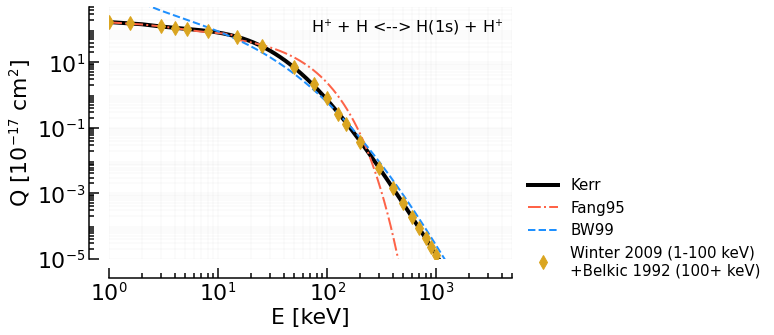

In [24]:
savepng = True
fname_out = 'CompareFits_Kerr_BW99_Fang95_Qp1'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(1s) + H$^{+}$'
xrange = [1, 5000]
yrange = [1e-5, 500]
cmaptemp = pal.cartocolors.sequential.Sunset_5.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.1,1.0,5))


labels = ['Kerr', 'Fang95', 'BW99', 'Winter 2009 (1-100 keV)\n+Belkic 1992 (100+ keV)']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'

    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(energy, kerr.Q_p1,
                   linewidth = 4, linestyle = '-', color = 'black',
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[0]
                 )
line2, = ax1.plot(energy, f95.Q_p1,
                   linewidth = 2, linestyle = '-.', color = 'tomato',
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[1]
                 )
line3, = ax1.plot(energy, bw99.Q_p1,
                   linewidth = 2, linestyle = '--', color = 'dodgerblue',
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[2]
                 )
line4, = ax1.plot(energy_tot, csec_tot_1,
                   linewidth = 0, linestyle = 'none', color = 'goldenrod',
#                   zorder = 0, alpha = 0.35,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[3]
                 )


leg1 = ax1.legend(handles=[line1,line2,line3,line4],loc=(1.025,-0.10), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

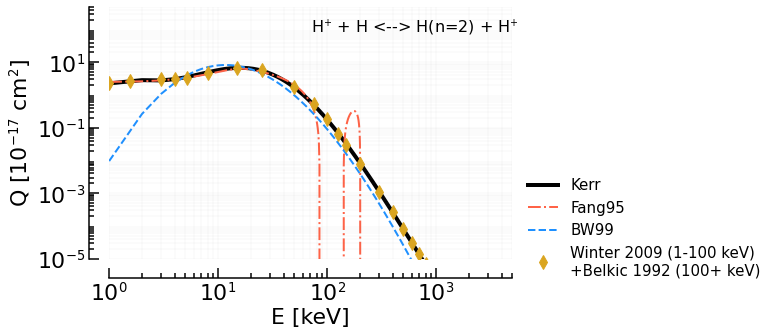

In [25]:
savepng = True
fname_out = 'CompareFits_Kerr_BW99_Fang95_Qp2'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(n=2) + H$^{+}$'
xrange = [1, 5000]
yrange = [1e-5, 500]
cmaptemp = pal.cartocolors.sequential.Sunset_5.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.1,1.0,5))


labels = ['Kerr', 'Fang95', 'BW99', 'Winter 2009 (1-100 keV)\n+Belkic 1992 (100+ keV)']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'

    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(energy, kerr.Q_p2,
                   linewidth = 4, linestyle = '-', color = 'black',
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[0]
                 )
line2, = ax1.plot(energy, f95.Q_p2,
                   linewidth = 2, linestyle = '-.', color = 'tomato',
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[1]
                 )
line3, = ax1.plot(energy, bw99.Q_p2,
                   linewidth = 2, linestyle = '--', color = 'dodgerblue',
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[2]
                 )
line4, = ax1.plot(energy_tot, csec_tot_2,
                   linewidth = 0, linestyle = 'none', color = 'goldenrod',
#                   zorder = 0, alpha = 0.35,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[3]
                 )


leg1 = ax1.legend(handles=[line1,line2,line3,line4],loc=(1.025,-0.10), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

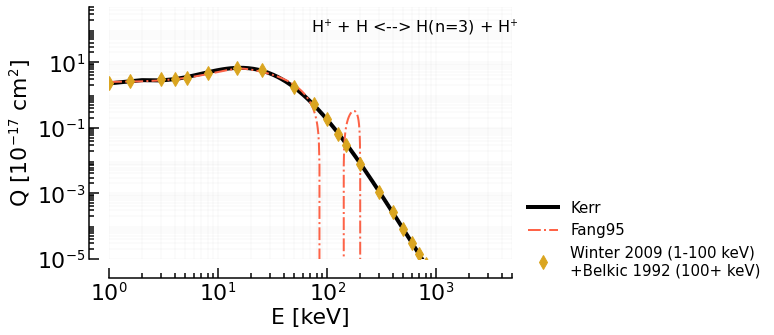

In [26]:
savepng = True
fname_out = 'CompareFits_Kerr_Fang95_Qp3'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(n=3) + H$^{+}$'
xrange = [1, 5000]
yrange = [1e-5, 500]
cmaptemp = pal.cartocolors.sequential.Sunset_5.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.1,1.0,5))


labels = ['Kerr', 'Fang95', 'Winter 2009 (1-100 keV)\n+Belkic 1992 (100+ keV)']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'

    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(energy, kerr.Q_p2,
                   linewidth = 4, linestyle = '-', color = 'black',
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[0]
                 )
line2, = ax1.plot(energy, f95.Q_p2,
                   linewidth = 2, linestyle = '-.', color = 'tomato',
                  zorder = 0, alpha = 1.0,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[1]
                 )
line3, = ax1.plot(energy_tot, csec_tot_2,
                   linewidth = 0, linestyle = 'none', color = 'goldenrod',
#                   zorder = 0, alpha = 0.35,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[2]
                 )


leg1 = ax1.legend(handles=[line1,line2,line3],loc=(1.025,-0.10), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

In [ ]:
shakeshaft78_fit = np.polynomial.polynomial.Polynomial.fit(np.log10(shakeshaft78.energy), np.log10(shakeshaft78.Q_p2), 4)
shakeshaft78_fit.convert().coef
shakeshaft78_fit_vals = np.polynomial.polynomial.Polynomial(shakeshaft78_fit.convert().coef)

In [ ]:
cheshire70_fit = np.polynomial.polynomial.Polynomial.fit(np.log10(cheshire70.energy[6:]), np.log10(cheshire70.Q_p1[6:]), 3)
cheshire70_fit.convert().coef
cheshire70_fit_vals = np.polynomial.polynomial.Polynomial(cheshire70_fit.convert().coef)

In [ ]:
plt.plot(np.log10(f95.energy),10**(pfit_vals(np.log10(f95.energy))), color = 'tomato',linestyle = '--')
plt.plot(np.log10(f95.energy),10**(cfit_exp_vals(np.log10(f95.energy))), color = 'dodgerblue', linestyle = ':')
# plt.plot(np.log10(f95.energy[16:]),np.log10(test), color = 'forestgreen')
# plt.plot(np.log10(f95.energy[16:]),np.log10(test2), color = 'black')
# plt.plot(np.log10(f95.energy[16:]),np.log10(test3), color = 'dimgrey',linestyle='--')



# plt.plot(np.log10(f95.energy), np.log10(f95.Q_p1))

plt.plot(np.log10(cheshire70.energy), (cheshire70.Q_p1),
                   linewidth = 0, linestyle = 'none', color = 'tomato',
                  zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 10
                 )
# plt.plot(np.log10(bates53.energy), np.log10(bates53.Q_p1),
#                    linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 50, alpha = 1,
#                    marker = 'd', markeredgewidth = 1, 
#                    markersize = 10
#                  )
# plt.ylim([-3,2])

plt.axvline(x=np.log10(16), linestyle = '--', color = 'black', alpha = 0.5)




In [ ]:
pfit_exp_vals = OZpy.CrossSections.cs_polyfit(cheshire70.energy, cheshire70.Q_p1, emin = 16.0, 
                                                       order = 5, log10E = True, log10Q = True)


In [ ]:
cfit_exp_vals = OZpy.CrossSections.cs_chebfit(cheshire70.energy, cheshire70.Q_p1, emin = 16.0, 
                                                       order = 5, log10E = True, log10Q = True)


In [ ]:
popt_hyp, pcov_hyp = OZpy.CrossSections.cs_hyberbolfit(cheshire70.energy, cheshire70.Q_p1, emin = 16.0,
                                                      emax = 1000.0,boundsin=[0,3,0,2,0,np.inf])
test2 = OZpy.CrossSections.hyperbolic_fn(f95.energy[16:], 
                                  *popt_hyp)
popt_exp, pcov_exp = OZpy.CrossSections.cs_expfit(cheshire70.energy, cheshire70.Q_p1, emin = 16.0,
                                                      emax = 1000.0, boundsin=[0.1, 3, -5,5])
test3 = OZpy.CrossSections.exponential_fn(f95.energy[16:], 
                                  *popt_exp)

In [ ]:
popt_exp

In [ ]:
popt_hyp

In [ ]:
test2

In [ ]:
cfit_exp_vals.coef

In [ ]:
5/6565.0*3e5

In [ ]:
energy_tot = np.concatenate((winter09.energy[0:11], belkic92.energy[7:]))
csec_tot_2 = np.concatenate((winter09.Q_p2[0:11],belkic92.Q_p2[7:]))
csec_tot_2s = np.concatenate((winter09.Q_p_2s[0:11],belkic92.Q_p_2s[7:]))
csec_tot_2p = np.concatenate((winter09.Q_p_2p[0:11],belkic92.Q_p_2p[7:]))
csec_tot_3 = np.concatenate((winter09.Q_p3[0:11],belkic92.Q_p3[7:]))
csec_tot_3s = np.concatenate((winter09.Q_p_3s[0:11],belkic92.Q_p_3s[7:]))
csec_tot_3p = np.concatenate((winter09.Q_p_3p[0:11],belkic92.Q_p_3p[7:]))
csec_tot_3d = np.concatenate((winter09.Q_p_3d[0:11],belkic92.Q_p_3d[7:]))

In [ ]:
plt.plot(np.log10(energy_tot), np.log10(csec_tot_2))
plt.plot(np.log10(energy_tot), np.log10(csec_tot_2s))
plt.plot(np.log10(energy_tot), np.log10(csec_tot_2p))
# plt.plot(np.log10(energy_tot), np.log10(csec_tot_3d))

plt.plot(np.log10(f95.energy),(cfit_exp_vals(np.log10(f95.energy))), color = 'tomato', linestyle = ':')


plt.ylim(-4, 1)




In [ ]:
cfit_exp_vals = OZpy.CrossSections.cs_chebfit(energy_tot,(csec_tot_2), 
                                                       order = 8, log10E = True, log10Q = False)
cfit_exp_vals2 = OZpy.CrossSections.cs_chebfit(energy_tot, csec_tot_2, 
                                                       order = 8, log10E = True, log10Q = True)
pfit_exp_vals = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_2,  
                                                       order = 12, log10E = True, log10Q = True)



In [ ]:
# plt.plot(np.log10(f95.energy),np.log10(np.exp((cfit_exp_vals(np.log10(f95.energy))))), color = 'dodgerblue', linestyle = ':')
# plt.plot(np.log10(f95.energy),np.log10(cfit_exp_vals(np.log10(f95.energy))), color = 'dodgerblue', linestyle = ':')
plt.plot(np.log10(f95.energy),(cfit_exp_vals2(np.log10(f95.energy))), color = 'tomato', linestyle = ':')
plt.plot(np.log10(f95.energy),(pfit_exp_vals(np.log10(f95.energy))), color = 'forestgreen', linestyle = ':')

# plt.plot(np.log10(f95.energy),100*((pfit_exp_vals(np.log10(f95.energy)))-(cfit_exp_vals2(np.log10(f95.energy))))/(pfit_exp_vals(np.log10(f95.energy))), color = 'forestgreen', linestyle = ':')



# plt.ylim([-100, 100])

# plt.xlim(1, 2)


cfit_exp_vals

In [ ]:
coeffs = [-9.76244e1, -8.02645, -9.03528, -6.82148e-1, 1.41138, -8.43613e-3, 1.31162e-1, -3.07135e-1, 3.60166e-1 ]
coeffs2 = [-9.47856e1, -1.36982e1, -7.48411, -6.55633e-1, 1.09973, 3.4255e-1, -2.02178e-1, -2.9912e-1, 2.88704e-1 ]

In [ ]:
test = np.polynomial.Chebyshev(coeffs)

In [ ]:
xx = (np.log((f95.energy*1000.0)/1e2) - np.log(1e5/(f95.energy*1000)))/np.log(1e5/1e2)

In [ ]:
plt.plot(f95.energy, (test(xx)))

In [ ]:
test(xx)

In [ ]:
coeffs = [0.811, 1.04, -0.369, 0.173, 0.00396, 0.152, -0.0638, 0.00303]

In [ ]:
test = np.polynomial.Chebyshev(coeffs)

In [ ]:
xx = (np.log(f95.energy/5.0) - np.log(80.0/f95.energy))/np.log(80/5)

In [ ]:
plt.plot(f95.energy, (test(xx)))
plt.xlim([5,80])
plt.ylim([1e-3, 2])

In [ ]:
test

In [ ]:
1092.0*0.1

In [ ]:
695.0*1e-18/1e-17

In [ ]:
1.37e-16/1e-17

In [ ]:
winter09.energy[0:11]

In [ ]:
belkic92.energy[7:]

In [ ]:
energy_tot